In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *

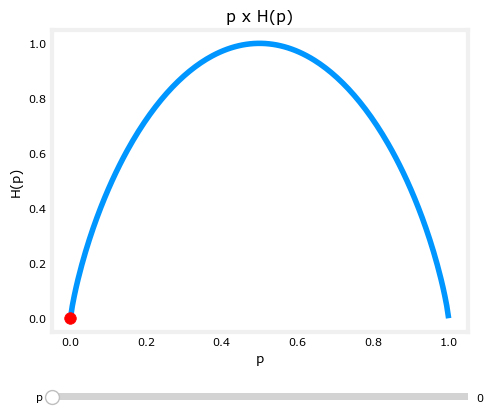

In [6]:
_ = plot_entropy()

In [9]:
X_train, y_train = np.array([[1,1,1],
    [0,0,1],
    [0,1,0],
    [1,0,1],
    [1,1,1],
    [1,1,0],
    [0,0,0],
    [1,1,0],
    [0,1,0],
    [0,1,0]]), np.array([1,1,0,0,1,1,0,1,0,0])

In [15]:
X_train[0,:]
def entropy(p):
    if p==0 or p==1:
        return 0
    else:
        return (-p*np.log2(p)-(1-p)*np.log2(1-p))
    
print(entropy(0.5))

1.0


In [16]:
def split_indices(X,index_feature):
    left_indices = []
    right_indices = []
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices


In [24]:
split_indices(X_train,0)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

In [25]:
def weighted_entropy(X,y,left_indices,right_indices):
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)

    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy


In [27]:
left_indices, right_indices = split_indices(X_train,0)
float(weighted_entropy(X_train,y_train,left_indices,right_indices))

0.7219280948873623

In [29]:
def information_gain(X,y,left_indices,right_indices):
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X,y,left_indices,right_indices)
    return (h_node - w_entropy)

information_gain(X_train,y_train,left_indices,right_indices)

np.float64(0.2780719051126377)

In [30]:
for i, feature_name in enumerate(['Ear Shape','Face Shape','Whiskers']):
    left_indices,right_indices = split_indices(X_train,i)
    i_gain = information_gain(X_train,y_train,left_indices,right_indices)
    print(f"feature : {feature_name} -  info gain : {i_gain}")

feature : Ear Shape -  info gain : 0.2780719051126377
feature : Face Shape -  info gain : 0.034851554559677034
feature : Whiskers -  info gain : 0.12451124978365313


In [ ]:
import pydot
import networkx
import graphviz
tree = []
build_tree_recursive(X_train,y_train,[0,1,2,3,4,5,6,7,8,9],"Root",max_depth=1,current_depth=0,tree=tree)
# bugged viz
# generate_tree_viz([0,1,2,3,4,5,6,7,8,9],y_train,tree)

 Depth 0, Root: Split on feature: 0
 - Left leaf node with indices [0, 3, 4, 5, 7]
 - Right leaf node with indices [1, 2, 6, 8, 9]


FileNotFoundError: [Errno 2] "dot" not found in path.